In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
ds=pd.read_csv('/content/sample_data/Fraud.csv')
a=ds['isFlaggedFraud'].unique()
print(a)
ds=ds.drop('isFlaggedFraud',axis=1)
ds.head()

[ 0. nan]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


In [2]:
ds.describe()
ds.duplicated().sum()
missing_values=ds.isnull().sum()
num_imputer=SimpleImputer(strategy='mean')
cat_imputer=SimpleImputer(strategy='most_frequent')
num_cols=ds.select_dtypes(include=['int64','float64']).columns
cat_cols=ds.select_dtypes(include=['object']).columns
ds[num_cols]=num_imputer.fit_transform(ds[num_cols])
ds[cat_cols]=cat_imputer.fit_transform(ds[cat_cols])

In [3]:
columns=ds.select_dtypes(include=['object']).columns
label_encoders={}
for column in columns:
    le=LabelEncoder()
    ds[column]=le.fit_transform(ds[column])
    label_encoders[column]=le
ds.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1.0,3,9839.64,8707,170136.0,160296.36,24765,0.0,0.0,0.0
1,1.0,3,1864.28,25308,21249.0,19384.72,25753,0.0,0.0,0.0
2,1.0,4,181.00,11501,181.0,0.00,7443,0.0,0.0,1.0
3,1.0,1,181.00,67579,181.0,0.00,6612,21182.0,0.0,1.0
4,1.0,3,11668.14,39790,41554.0,29885.86,13110,0.0,0.0,0.0


<Axes: >

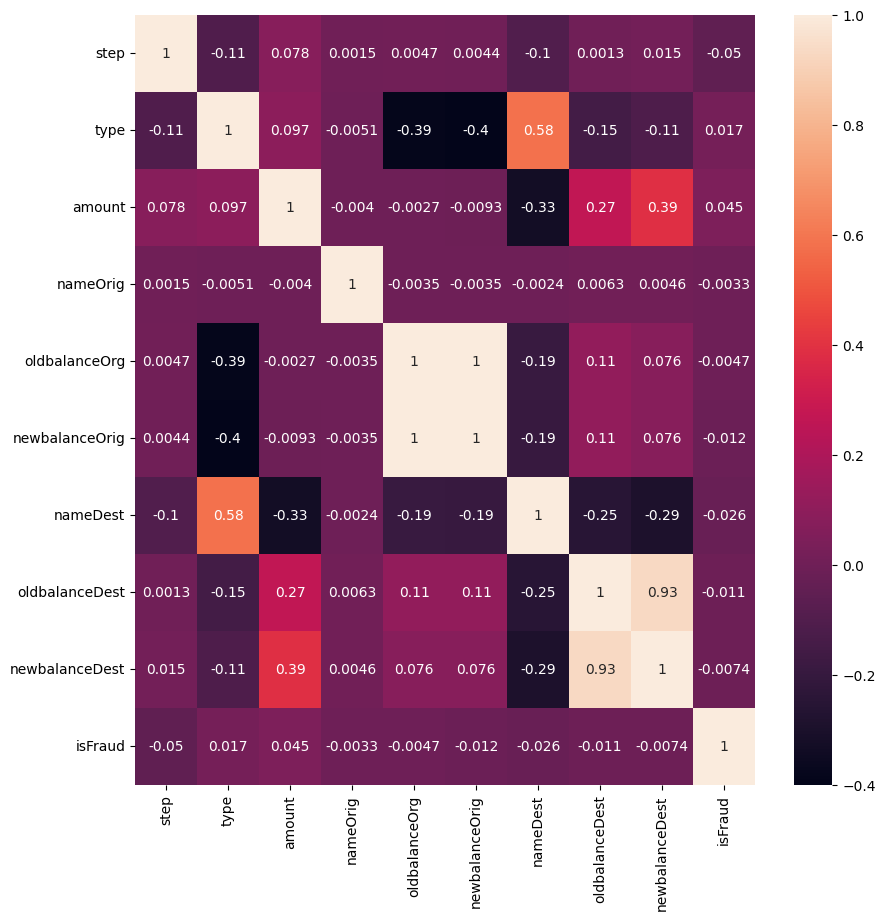

In [4]:
corr1=ds.select_dtypes(include='number').corr()
plt.figure(figsize=(10,10))
sb.heatmap(corr1,annot=True)

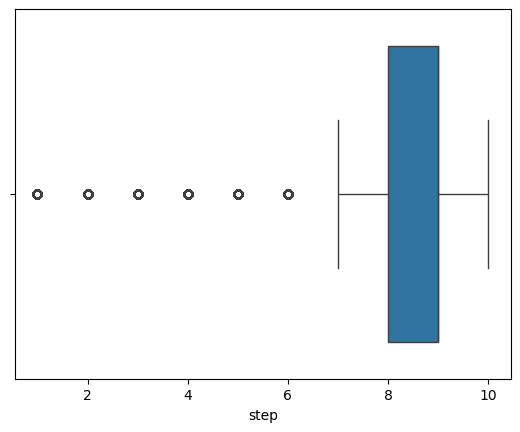

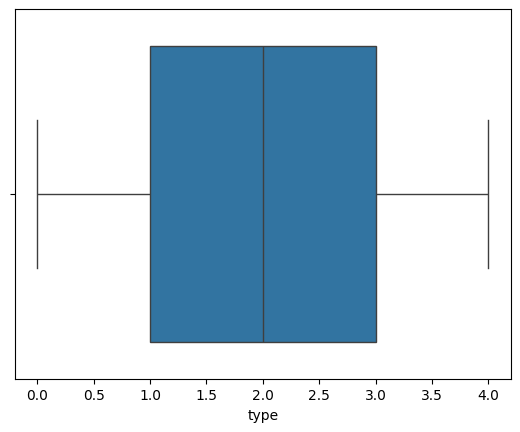

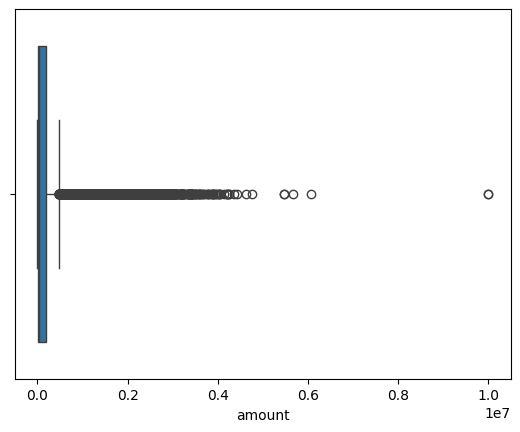

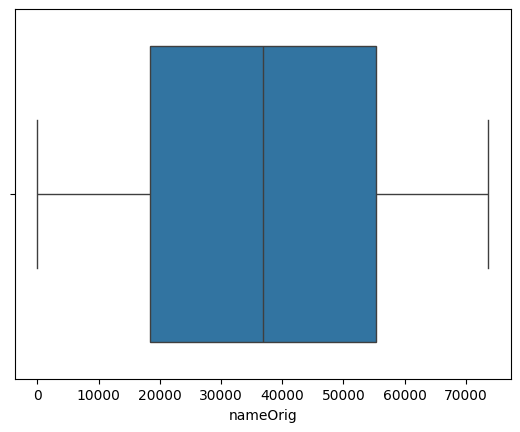

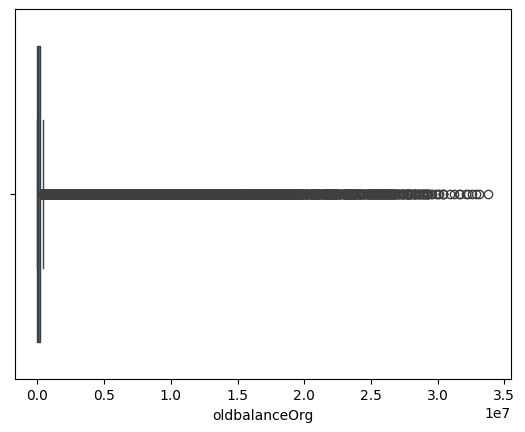

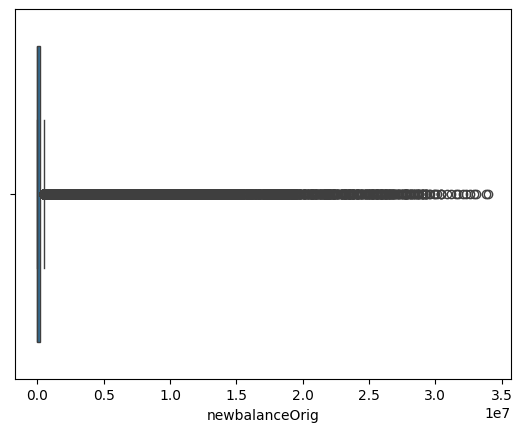

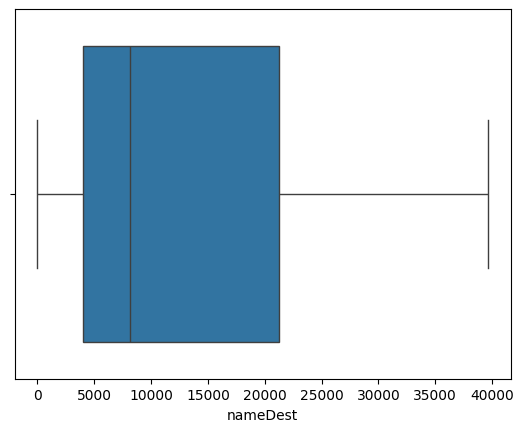

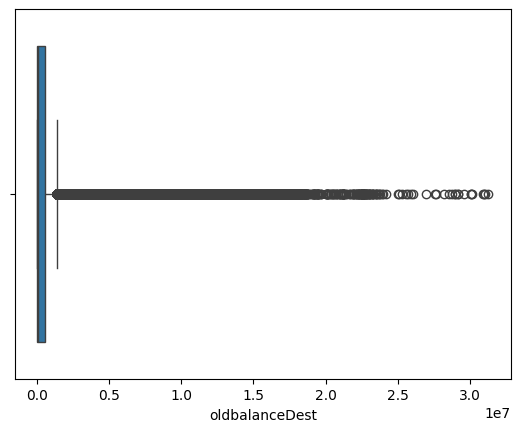

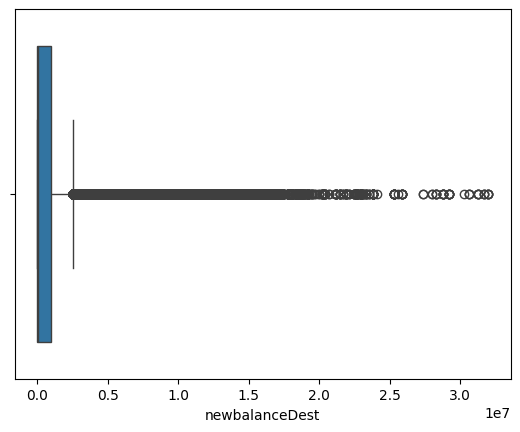

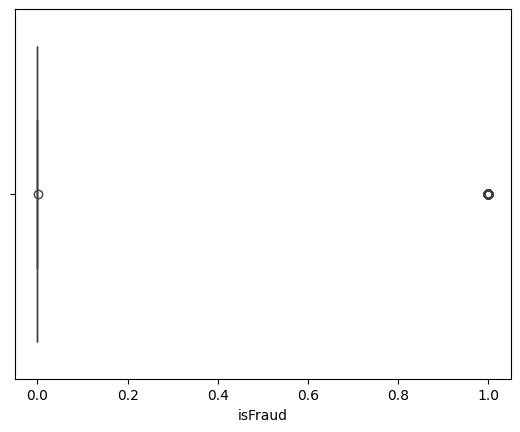

In [5]:
warnings.filterwarnings('ignore')
for i in ds.select_dtypes(include='number').columns:
  sb.boxplot(data=ds,x=i)
  plt.show()

In [6]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    return lower,upper
for column in ds.select_dtypes(include=[np.number]).columns:
    lower,upper=wisker(ds[column])
    ds[column]=np.where(ds[column]<lower,lower,ds[column])
    ds[column]=np.where(ds[column]>upper,upper,ds[column])

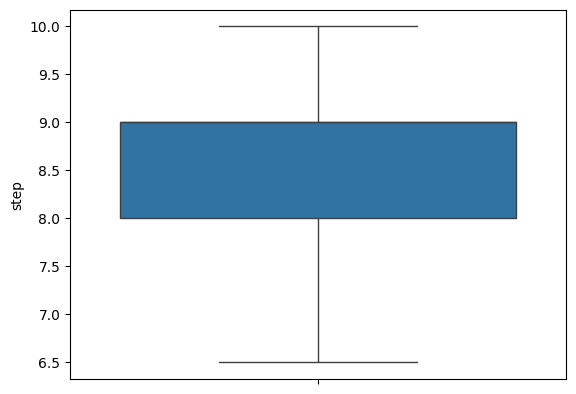

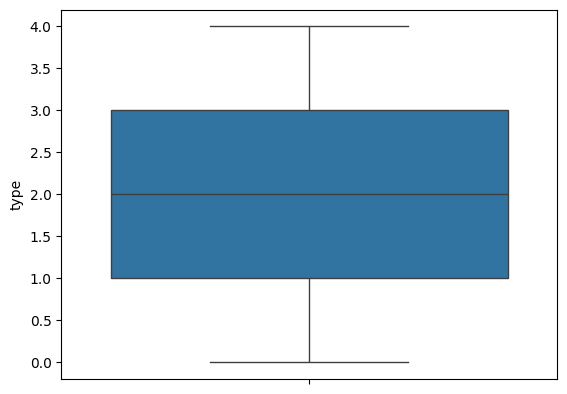

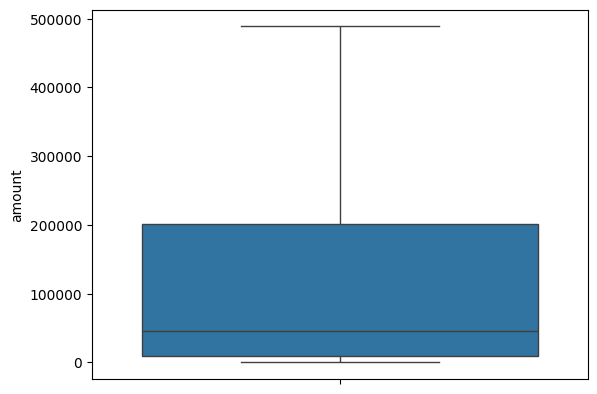

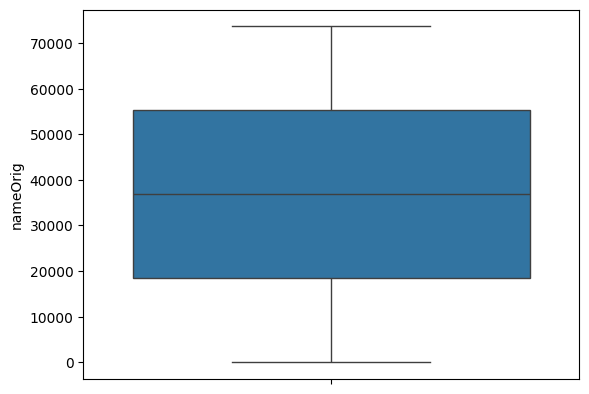

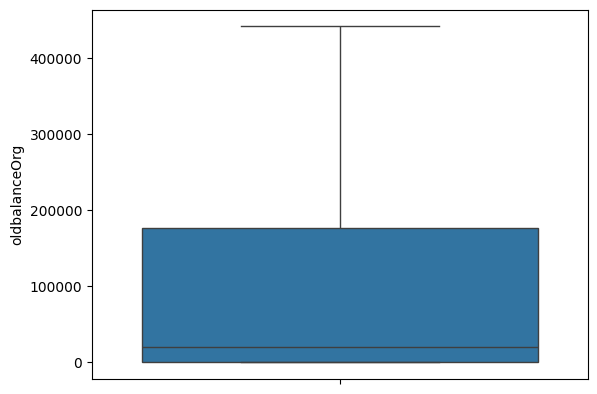

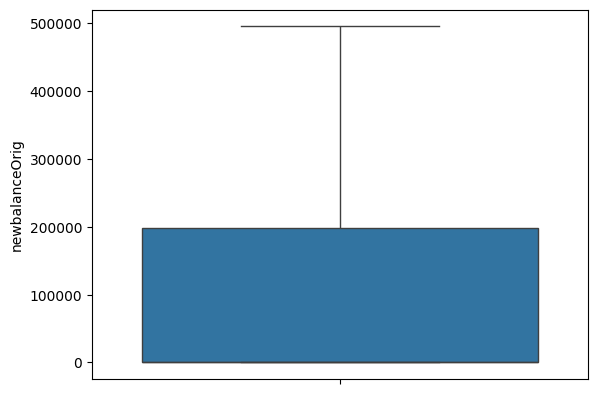

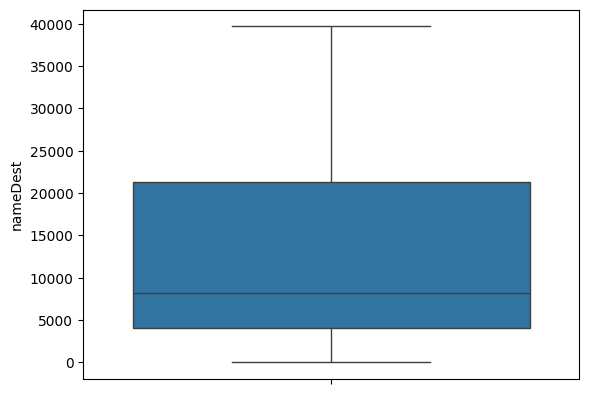

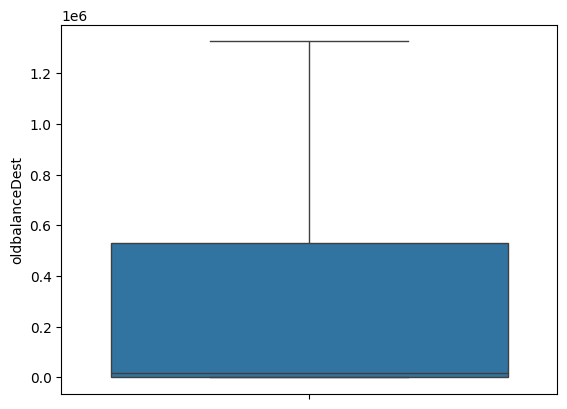

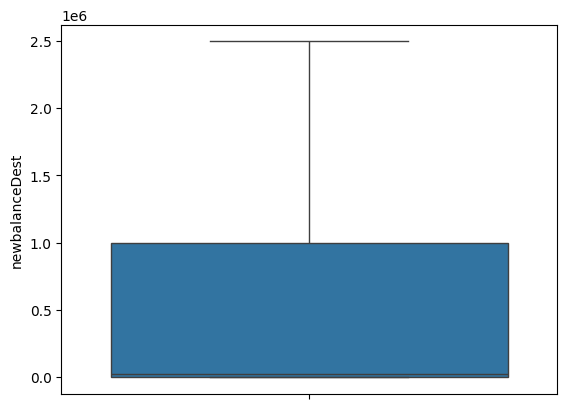

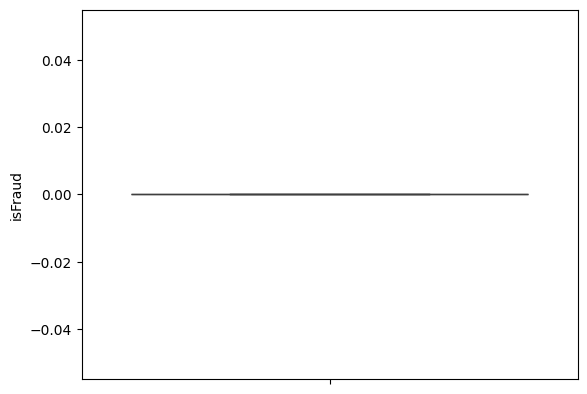

In [7]:
for i in ['step',	'type'	,'amount',	'nameOrig',	'oldbalanceOrg'	,'newbalanceOrig',	'nameDest'	,'oldbalanceDest'	,'newbalanceDest'	,'isFraud'	]:
       sb.boxplot(ds[i])
       plt.show()

In [8]:
X=ds.drop('isFraud',axis=1)
y=ds['isFraud']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
print(model.score(X_test,y_test))
y_pred = model.predict(X_test)

1.0


In [14]:
import pickle
from sklearn.metrics import mean_squared_error
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
y_pred = loaded_model.predict(X_test)
print("Loaded Model Score:", loaded_model.score(X_test, y_test))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Loaded Model Score: 1.0
Mean Squared Error: 0.0


In [15]:
ds.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,6.5,3.0,9839.64,8707.0,170136.0,160296.36,24765.0,0.0,0.0,0.0
1,6.5,3.0,1864.28,25308.0,21249.0,19384.72,25753.0,0.0,0.0,0.0
2,6.5,4.0,181.00,11501.0,181.0,0.00,7443.0,0.0,0.0,0.0
3,6.5,1.0,181.00,67579.0,181.0,0.00,6612.0,21182.0,0.0,0.0
4,6.5,3.0,11668.14,39790.0,41554.0,29885.86,13110.0,0.0,0.0,0.0


In [17]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
model=joblib.load('/content/random_forest_model.pkl')
numerical_features=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
categorical_features=['type','nameOrig','nameDest']
preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numerical_features),
        ('cat',OneHotEncoder(),categorical_features)
    ])
pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',RandomForestRegressor(random_state=42))
])
pipeline.fit(X_train,y_train)
with open('pipeline.pkl','wb') as file:
    pickle.dump(pipeline,file)
with open('pipeline.pkl','rb') as file:
    loaded_pipeline=pickle.load(file)
new_data=pd.DataFrame({
    'step':[1],
    'type':[4],
    'amount':[10000],
    'nameOrig':[8707],
    'oldbalanceOrg':[180000],
    'newbalanceOrig':[170000],
    'nameDest':[0],
    'oldbalanceDest':[0],
    'newbalanceDest':[0]


})
predictions=loaded_pipeline.predict(new_data)
print(predictions)



[0.]
